In [4]:
# Standard libraries
import numpy as np
import json
import h5py
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from ipywidgets import interactive, IntProgress
from IPython.display import display

# Append base directory
import os,sys,inspect
rootname = "pub-2020-exploratory-analysis"
thispath = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootpath = os.path.join(thispath[:thispath.index(rootname)], rootname)
sys.path.append(rootpath)
print("Appended root directory", rootpath)

from mesostat.utils.qt_helper import gui_fnames, gui_fpath
from mesostat.metric.metric import MetricCalculator

from lib.sych.data_fc_db import DataFCDatabase

%load_ext autoreload
%autoreload 2

Appended root directory /home/alyosha/work/git/pub-2020-exploratory-analysis
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# tmp_path = root_path_data if 'root_path_data' in locals() else "./"
params = {}
# params['root_path_data']  = gui_fpath("Path to data collection",  './')
params['root_path_data'] = '/media/alyosha/Data/TE_data/yarodata/neuro'

#params['root_path_paw']   = gui_fpath("Path to Paw data",         params['root_path_data'])
#params['root_path_lick']  = gui_fpath("Path to Lick data",        params['root_path_paw'])
#params['root_path_whisk'] = gui_fpath("Path to Whisk Data",       params['root_path_lick'])
# params['root_path_te']    = gui_fpath("Select TE results folder", params['root_path_data'])

In [6]:
dataDB = DataFCDatabase(params)

Target trial within [0, 8] sec. Total target timesteps 161
Searching for channel labels
Searching for data files
No paw path provided, skipping
No lick path provided, skipping
No whisk path provided, skipping


In [7]:
dataDB.read_te_files()
dataDB.read_neuro_files()
dataDB.read_resample_paw_files()
dataDB.read_resample_lick_files()   # Currently does not work. Ask Yaro if we need it
dataDB.read_resample_whisk_files()

No TE files loaded, skipping reading part


IntProgress(value=0, description='Read Neuro Data:', max=220)

Calculated performance 0.7264150943396226 does not match external 0.7333333333333333
Calculated performance 0.803680981595092 does not match external 0.808641975308642
Calculated performance 0.8411764705882353 does not match external 0.8436578171091446
Calculated performance 0.956989247311828 does not match external 0.9621621621621622
Calculated performance 0.6808510638297872 does not match external 0.6956521739130435
Calculated performance 0.9582366589327146 does not match external 0.9604651162790697
Calculated performance 0.4851258581235698 does not match external 0.4840182648401826
--Warning: For iMISS behaviour max index 437 exceeds nTrials 437
---Cropped excessive behaviour trials from 86 to 85
Calculated performance 0.42795389048991356 does not match external 0.6902017291066282
Calculated performance 0.2534562211981567 does not match external 0.30386740331491713
Calculated performance 0.4444444444444444 does not match external 0.47227191413237923
Calculated performance 0.56680161

--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_8 ; Using calculated
--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_8 ; Using calculated
--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_9 ; Using calculated
--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_9 ; Using calculated
--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_9 ; Using calculated
--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_9 ; Using calculated
--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_9 ; Using calculated
--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_9 ; Using calculated
--Warning: No performance metrics found for /media/alyos

In [8]:
pTHR = 0.7
dataDB.mark_days_expert_naive(pTHR)

# Multi-Regional Metrics

* Measures of instantainous redundancy
    - Average Correlation
    - PCA(1) - ?
    - Entropy, TC
* Measures of temporal relations
    - CrossCorrelation
    - CrossMI
    - PI_ND
    
## TODO
1. Normalization of entropy
    * Check if entropy outliers correlate with number of trials
    * Test NPEET metrics for convergence.
    * Check why TC is sometimes negative, it should not be
2. Improve convergence using sliding window to increase number of samples

doing mouse mtp_1
doing mouse mtp_10
doing mouse mtp_11
doing mouse mtp_12
doing mouse mtp_13
doing mouse mtp_15
doing mouse mtp_16
doing mouse mtp_2
doing mouse mtp_7
doing mouse mvg_2
doing mouse mvg_3
doing mouse mvg_4
doing mouse mvg_5
doing mouse mvg_6
doing mouse mvg_7
doing mouse mvg_8
doing mouse mvg_9


/opt/anaconda3/envs/py36nest/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


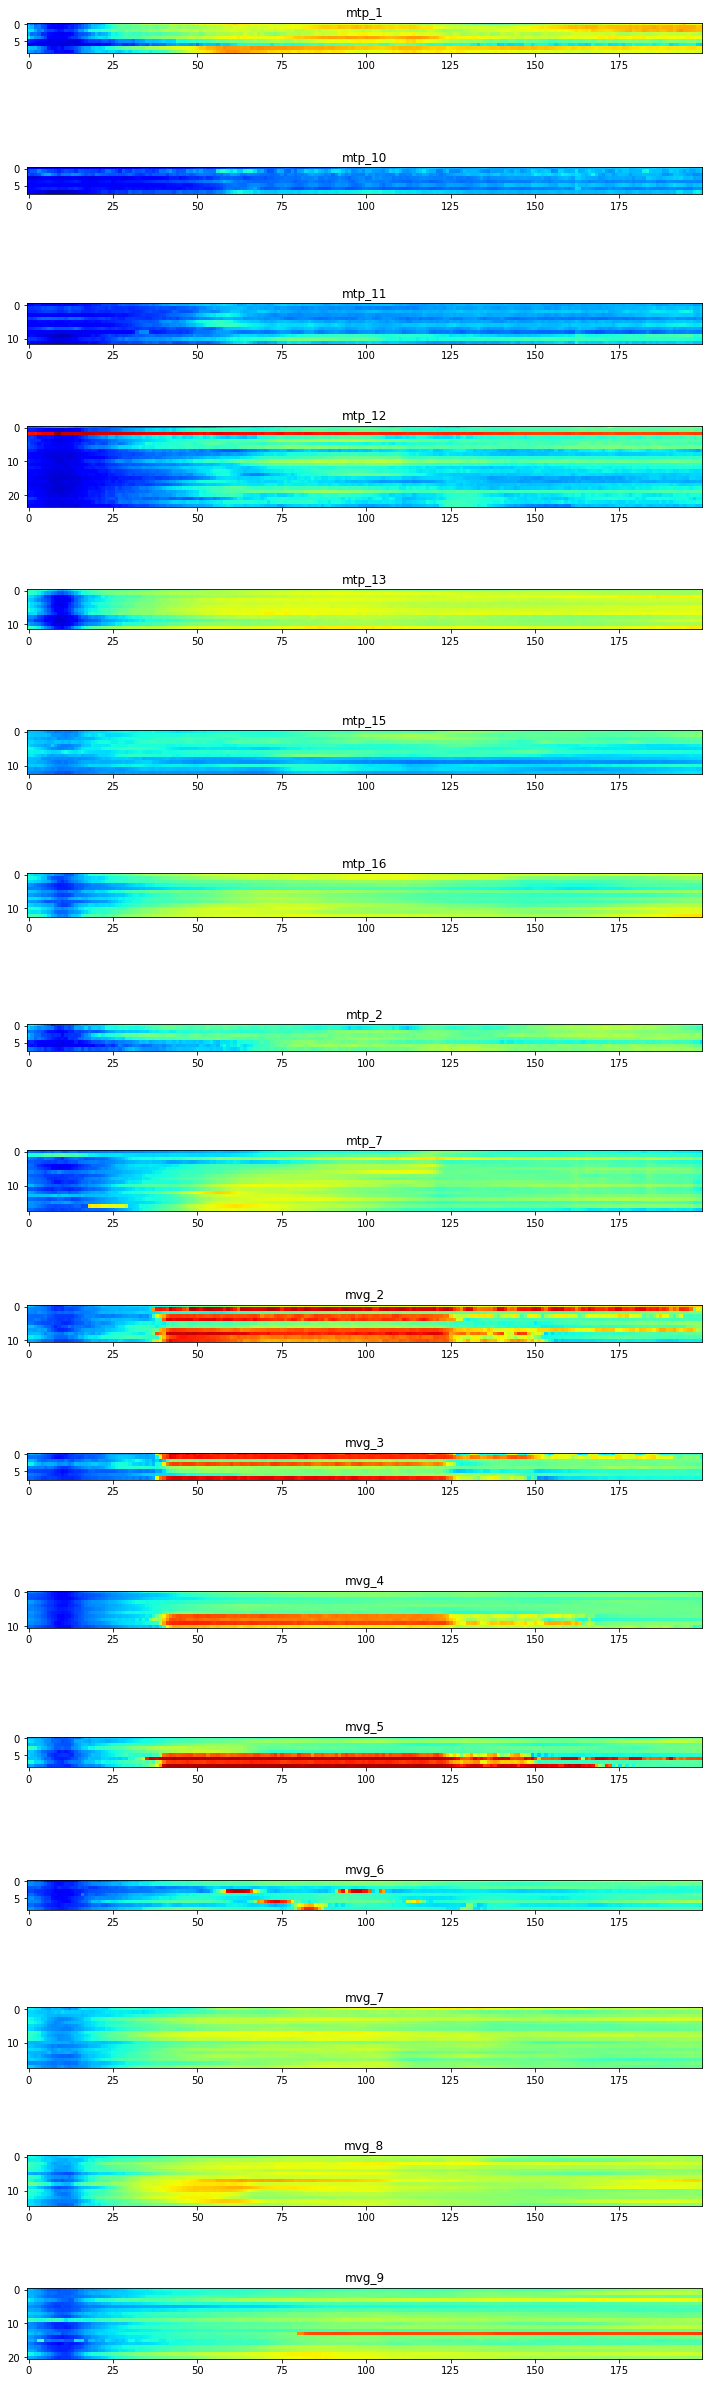

In [6]:
mc = MetricCalculator(serial=True, verbose=False)

fig, ax = plt.subplots(nrows=len(dataDB.mice), figsize=(10, 2 * len(dataDB.mice)), tight_layout=True)
for iMouse, mousename in enumerate(sorted(dataDB.mice)):
    print('doing mouse', mousename)
    rows = dataDB.get_rows('neuro', {'mousename' : mousename})
    
    rez = []
    for idx, row in rows.iterrows():
        mc.set_data(dataDB.dataNeuronal[idx], 'rsp', zscoreDim=None)
        rez += [mc.metric3D('avgcorr', 's', metricSettings=None, sweepSettings=None)[:200]]
        
    ax[iMouse].set_title(mousename)
    ax[iMouse].imshow(np.array(rez), cmap='jet', vmin=0, vmax=1)
plt.show()

mtp_1 -0.1307044906078463 2.179234609475568
mtp_10 0.19453277341150266 2.1049968488979465
mtp_11 1.0810296443599177 2.0880728807565707
mtp_12 0.09221156136182646 2.1158095894453086
mtp_13 0.021634251575668523 1.8774427533378215
mtp_15 0.7286882305161652 1.8325952285630975
mtp_16 0.517611422593495 1.9672739056559445
mtp_2 1.0590060861604942 2.170234195097771
mtp_7 1.0941041278323407 1.989983818880973
mvg_2 -0.9221366369337592 2.0108330608147704
mvg_3 -0.4491631328377584 1.9686762271204394
mvg_4 0.37732187985839327 2.413114973696962
mvg_5 -0.10536114538803044 2.090872244209929
mvg_6 -0.696324026399675 2.064679557974475
mvg_7 0.7311402009721545 2.2472095100980862
mvg_8 0.9228318885134601 2.423341054018342
mvg_9 0.9368380905104049 2.57304429487732


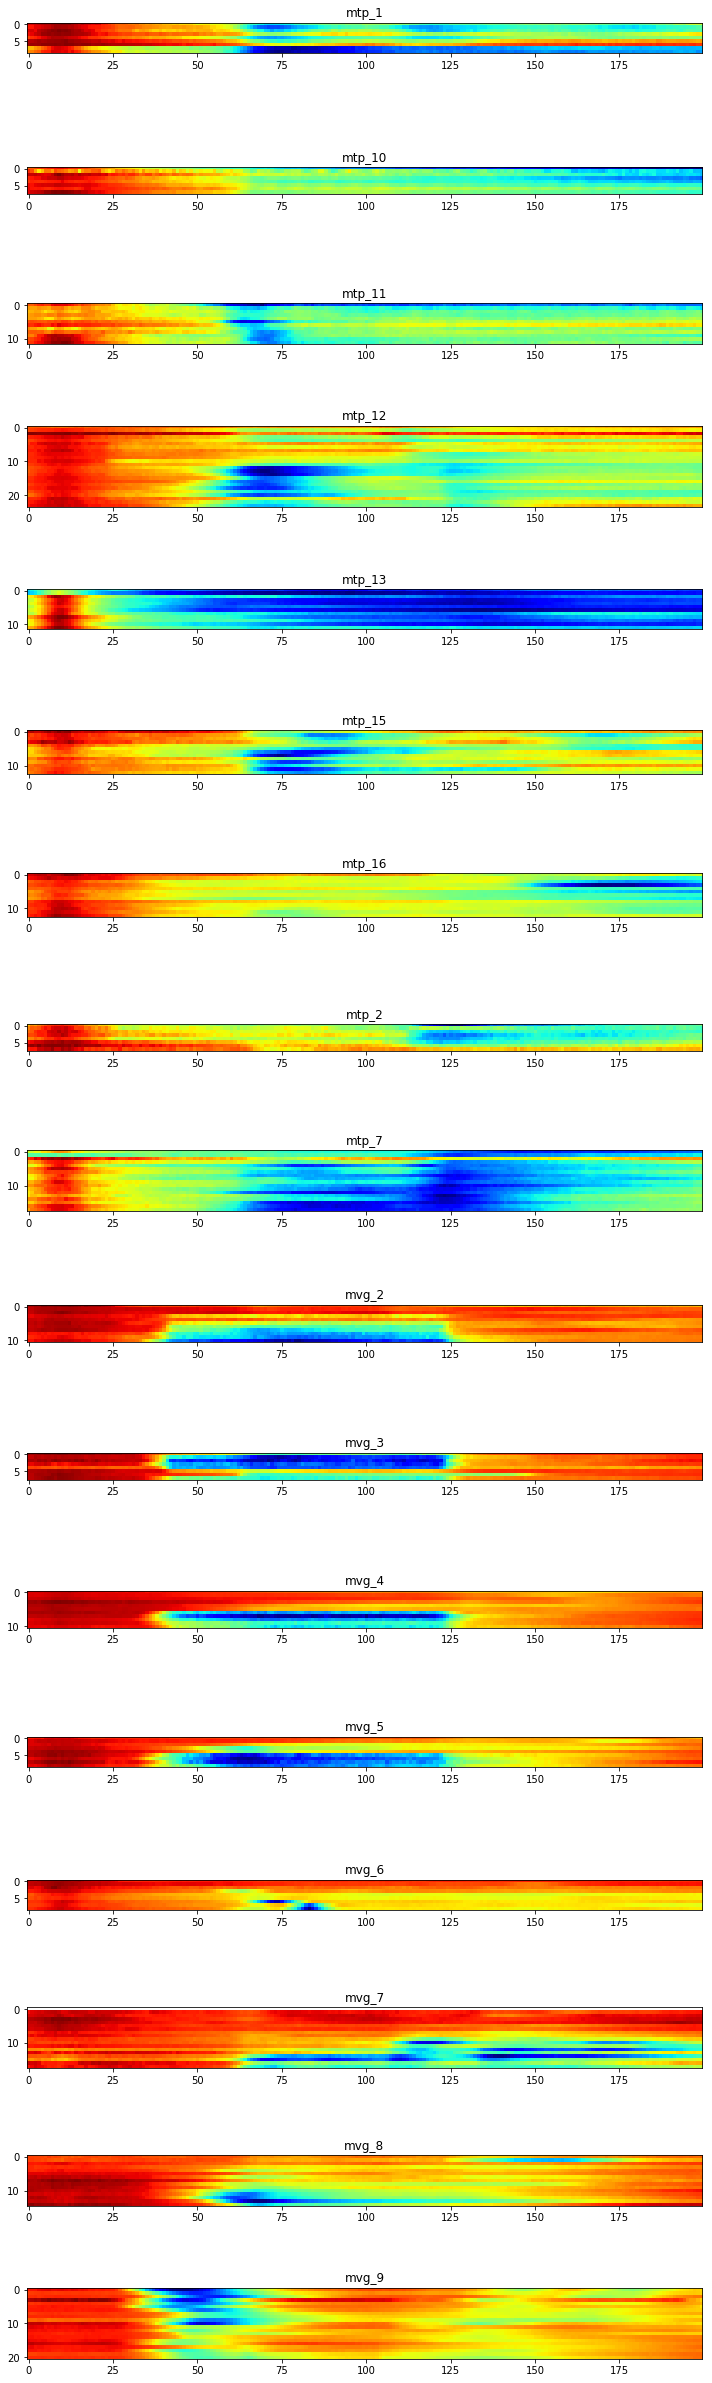

In [9]:
mc = MetricCalculator(serial=False, verbose=False)

fig, ax = plt.subplots(nrows=len(dataDB.mice), figsize=(10, 2 * len(dataDB.mice)), tight_layout=True)
for iMouse, mousename in enumerate(sorted(dataDB.mice)):
    rows = dataDB.get_rows('neuro', {'mousename' : mousename})
    
    rez = []
    for idx, row in rows.iterrows():
        mc.set_data(dataDB.dataNeuronal[idx], 'rsp', zscoreDim='p')
        rez += [mc.metric3D('avg_entropy', 's', metricSettings=None, sweepSettings=None)[:200]]
        
    print(mousename, np.nanmin(rez), np.nanmax(rez))
        
    ax[iMouse].set_title(mousename)
    ax[iMouse].imshow(np.array(rez), cmap='jet')
plt.show()

mtp_1 -0.19269710027351894 0.7197262870235798
mtp_10 -0.1646337486074574 0.786007136814167
mtp_11 -0.1196452559497525 0.20203703639872694
mtp_12 -0.16745376870261253 0.5256451331020058
mtp_13 0.007871227660298574 0.9823186173818633
mtp_15 0.0844296472670949 0.6119068421642109
mtp_16 -0.14470462250990757 0.5341477420069332
mtp_2 -0.2120532641006947 0.2606330049843437
mtp_7 -0.1022309922963407 0.3685113791037644
mvg_2 -0.12212491527434444 1.3980022032279058
mvg_3 -0.08067566774222645 0.8852351712792441
mvg_4 -0.7127064472395457 0.42204657981197014
mvg_5 -0.12495512439398859 1.0456588383468324
mvg_6 -0.15081621490054586 1.3694152816398635
mvg_7 -0.4667272422891986 0.23315706866341523
mvg_8 -0.7097555248702119 -0.15745554541634466
mvg_9 -0.9377030835903948 -0.37815006420364217


/opt/anaconda3/envs/py36nest/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


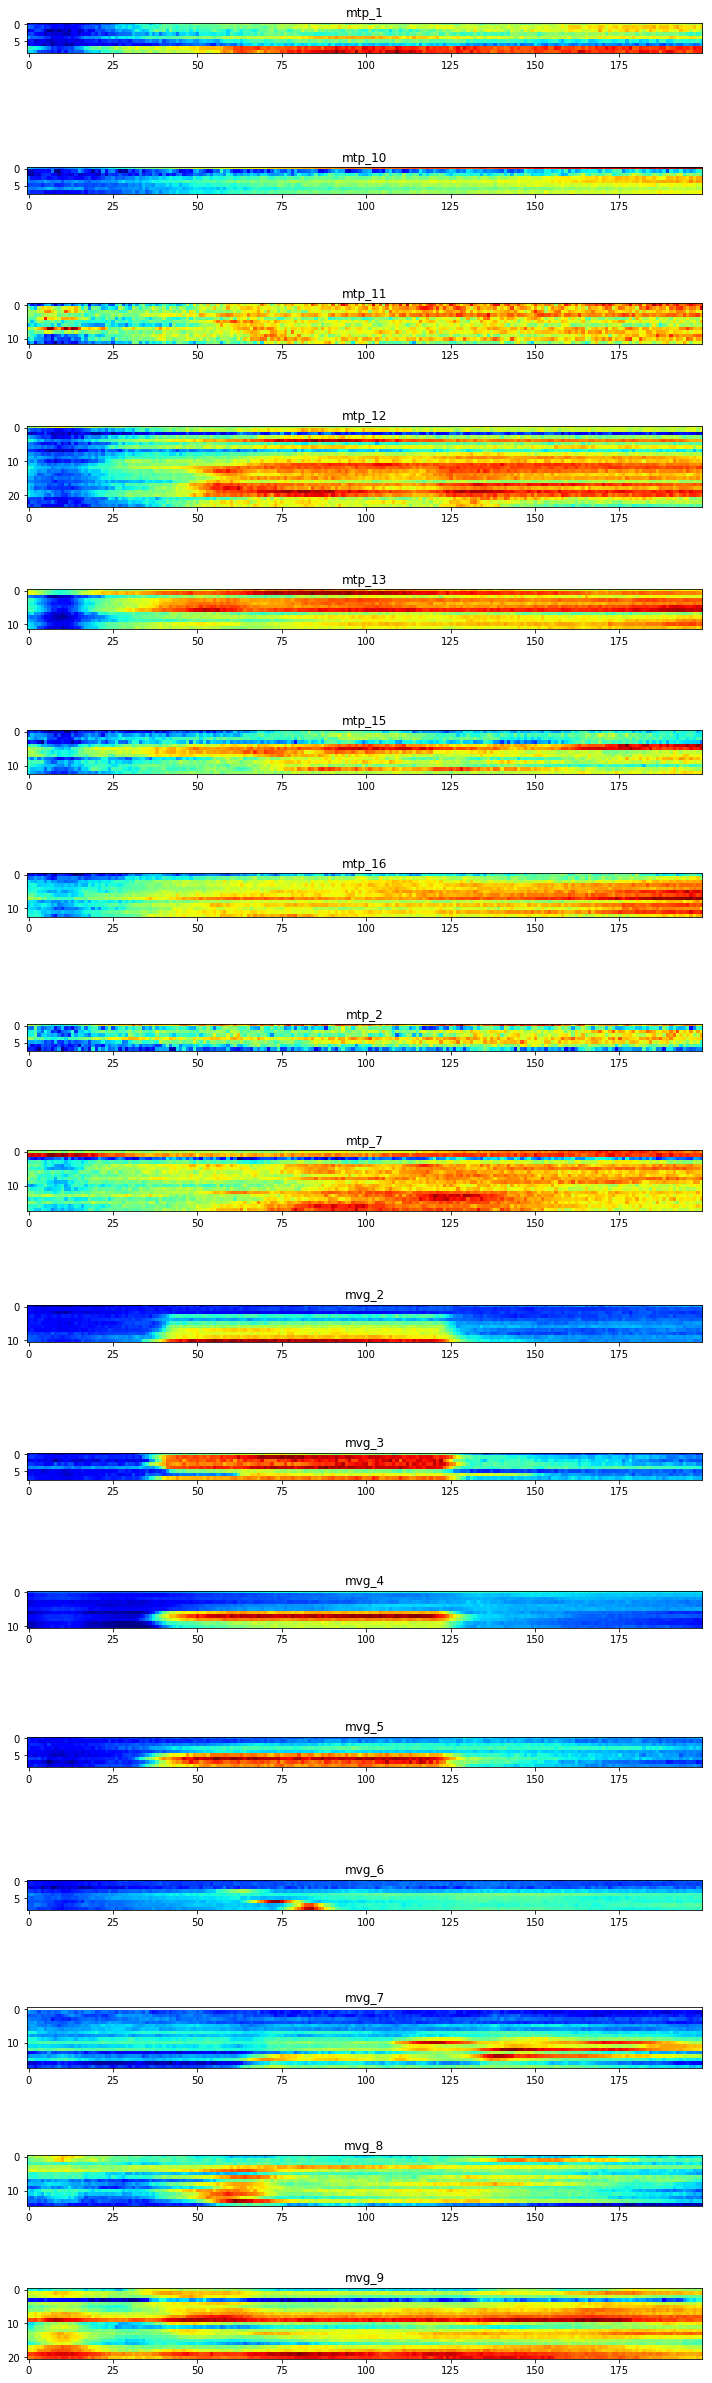

In [17]:
mc = MetricCalculator(serial=True, verbose=False)

fig, ax = plt.subplots(nrows=len(dataDB.mice), figsize=(10, 2 * len(dataDB.mice)), tight_layout=True)
for iMouse, mousename in enumerate(sorted(dataDB.mice)):
    rows = dataDB.get_rows('neuro', {'mousename' : mousename})
    
    rez = []
    for idx, row in rows.iterrows():
        mc.set_data(dataDB.dataNeuronal[idx], 'rsp', zscoreDim='p')
        rez += [mc.metric3D('avg_TC', 's', metricSettings=None, sweepSettings=None)[:200]]
        
    print(mousename, np.nanmin(rez), np.nanmax(rez))
        
    ax[iMouse].set_title(mousename)
    ax[iMouse].imshow(np.array(rez), cmap='jet')
plt.show()

mtp_1 0.027238302755551416 0.3174268565308072
mtp_10 0.03313647862419953 0.4549775141688104
mtp_11 0.0795036280494064 0.4246415085491526
mtp_12 0.031792735586960254 0.39317091110369917
mtp_13 0.11659396852999891 0.5260358476596987
mtp_15 0.1787763926528058 0.5379661242669731
mtp_16 0.1713570281414464 0.5891706155941449
mtp_2 0.011242355151294042 0.37121566433917597
mtp_7 0.1275090977031374 0.5561443199540741
mvg_2 0.11476541041161047 0.44059530316985934
mvg_3 0.11100592137416739 0.48169191143424467
mvg_4 0.046798024789070754 0.13940986147580026
mvg_5 0.0853687424193918 0.5081602839850822
mvg_6 0.11469472500147732 0.49878086492373
mvg_7 0.026841606819678347 0.12119747873467097
mvg_8 0.03974073542619495 0.12774823656423048
mvg_9 0.03678964872375456 0.14116759495180048


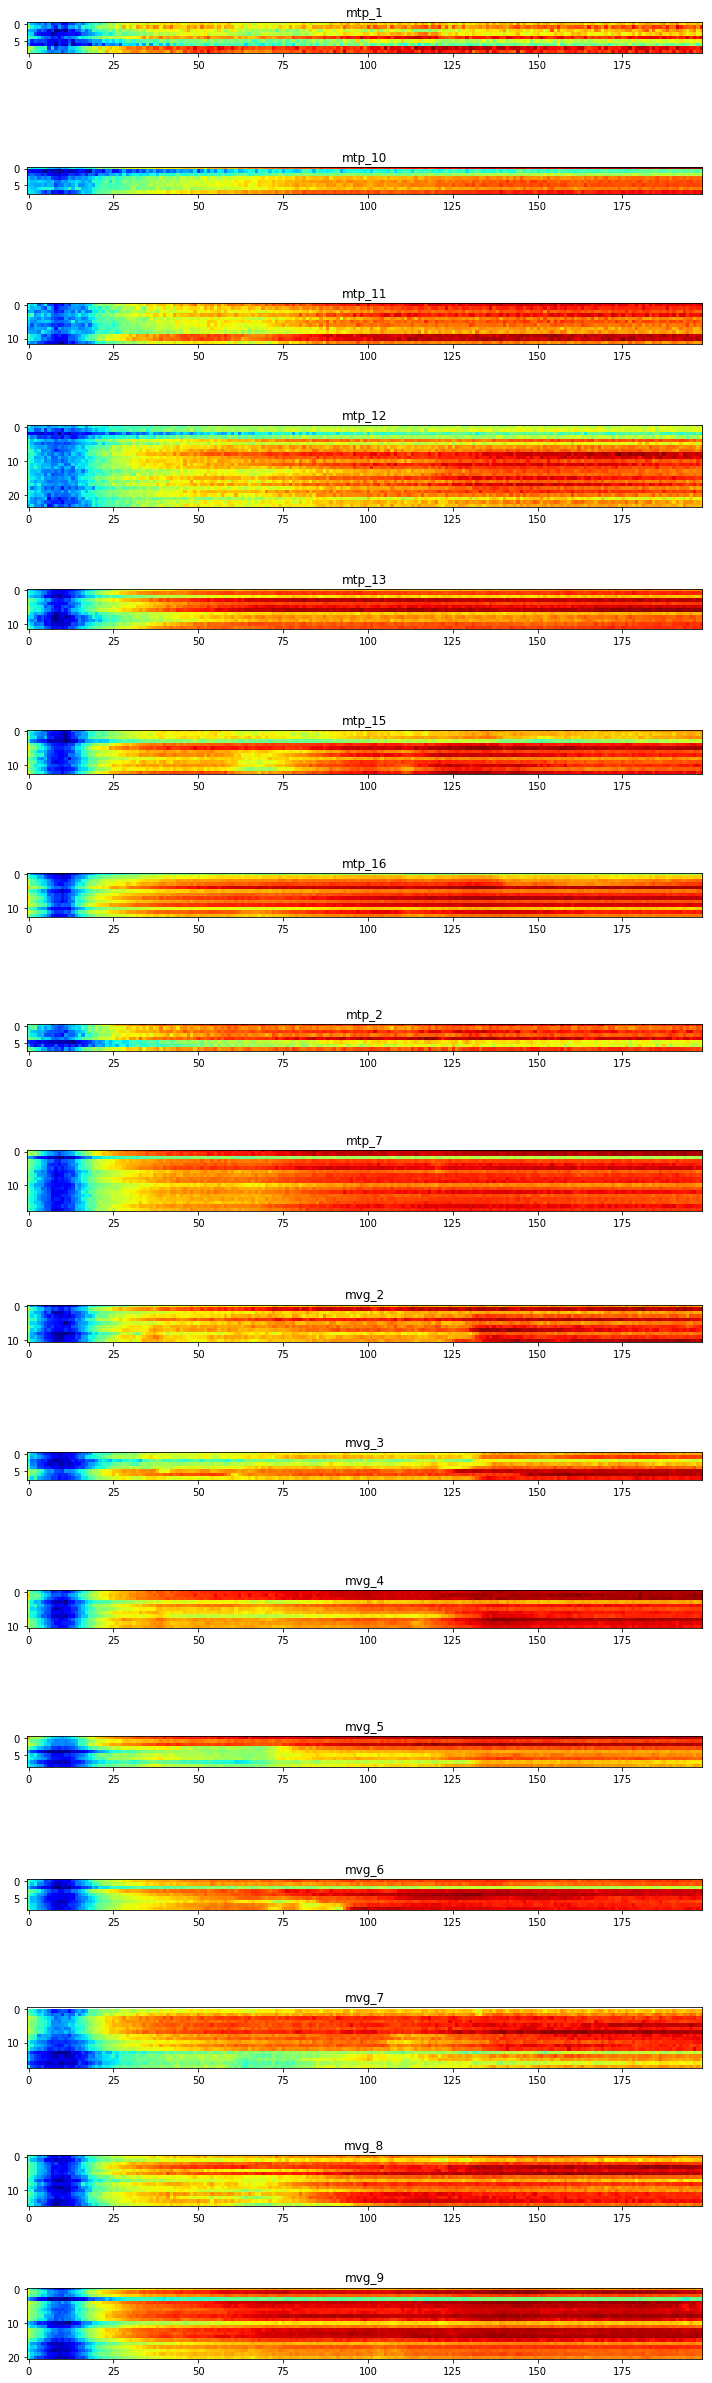

In [15]:
maxLag = 1
mc = MetricCalculator(serial=False, verbose=False)

fig, ax = plt.subplots(nrows=len(dataDB.mice), figsize=(10, 2 * len(dataDB.mice)), tight_layout=True)
for iMouse, mousename in enumerate(sorted(dataDB.mice)):
    rows = dataDB.get_rows('neuro', {'mousename' : mousename})
    
    rez = []
    for idx, row in rows.iterrows():
        mc.set_data(dataDB.dataNeuronal[idx], 'rsp', zscoreDim='p', timeWindow=2)
        rez += [mc.metric3D('avg_PI', 's', metricSettings={'max_lag': maxLag}, sweepSettings=None)[:200-maxLag]]
        
    print(mousename, np.nanmin(rez), np.nanmax(rez))
        
    ax[iMouse].set_title(mousename)
    ax[iMouse].imshow(np.array(rez), cmap='jet')
plt.show()